In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn
import matplotlib
import powerlaw
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
savepath = Fdrop + 'Project/' + experiment + os.sep 
av_list = sorted(glob.glob('*redo*av*'))[880:]
pkg_list = sorted(glob.glob('*redo*pkg*'))[880:]

In [3]:
for i in range(len(pkg_list)):
    br = crfn.branch(np.load(pkg_list[i]), np.load(av_list[i]))
    name = pkg_list[i][:pkg_list[i].find('pkg')] 
    np.save(savepath + name + '-branch.npy', br)
    print('Done ' + str(i))

doing time step 0 of 4914
doing time step 491 of 4914
doing time step 982 of 4914
doing time step 1473 of 4914
doing time step 1964 of 4914
doing time step 2455 of 4914
doing time step 2946 of 4914
doing time step 3437 of 4914
doing time step 3928 of 4914
doing time step 4419 of 4914
doing time step 4910 of 4914
Done 0
doing time step 0 of 4914
doing time step 491 of 4914
doing time step 982 of 4914
doing time step 1473 of 4914
doing time step 1964 of 4914
doing time step 2455 of 4914
doing time step 2946 of 4914
doing time step 3437 of 4914
doing time step 3928 of 4914
doing time step 4419 of 4914
doing time step 4910 of 4914
Done 1
doing time step 0 of 4914
doing time step 491 of 4914
doing time step 982 of 4914
doing time step 1473 of 4914
doing time step 1964 of 4914
doing time step 2455 of 4914
doing time step 2946 of 4914
doing time step 3437 of 4914
doing time step 3928 of 4914
doing time step 4419 of 4914
doing time step 4910 of 4914
Done 2
doing time step 0 of 4914
doing time 

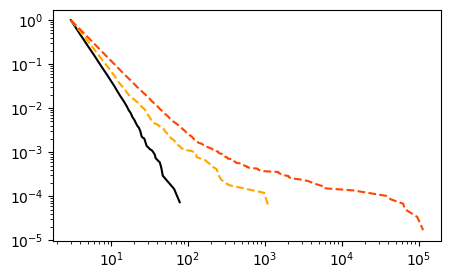

In [2]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

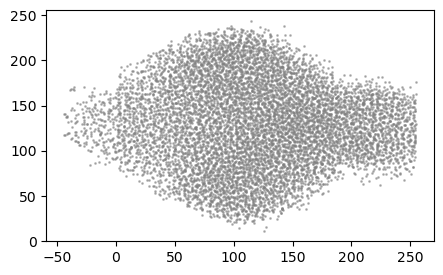

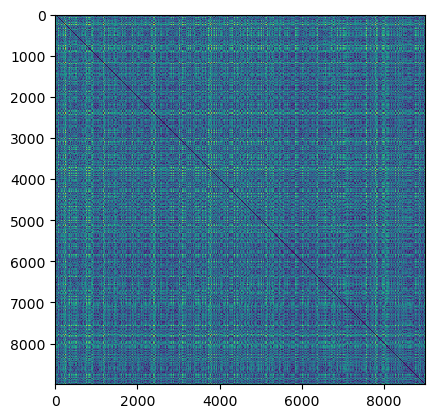

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,3))
nodes = np.load(node[0])
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'grey' , alpha = 0.5)
plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

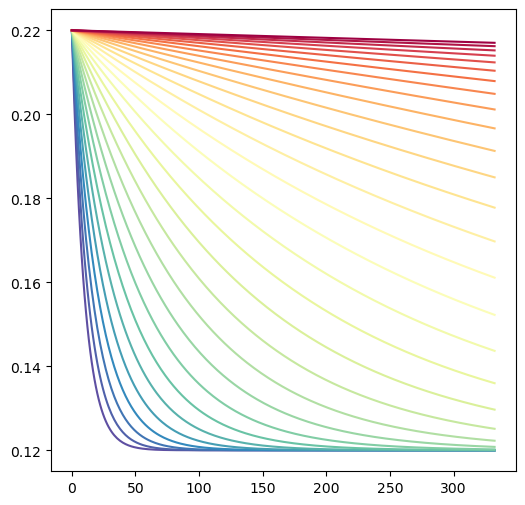

In [4]:
#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#s = 1.2, soften = 0.1, divisor = 10
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, r,s):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights

#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()
s = 1.2
#Plot each s value
fig, ax = plt.subplots(1, figsize=(6,6))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for r in range(len(r_vals)):
    ax.plot(distance, dist2edge(distance, divisor, r_vals[r], s), c=colors[r])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

In [5]:
import brian2 as b2
from random import sample
from numpy import random

## LIF PARAMETERS
#Network dynamics
sim_time = 400
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value
s = 1.2 #Synaptic weights

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

In [6]:
input_range = np.linspace(5, 100, 20)
input_range

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [10]:
k_vals = np.arange(1, 35, 1)
k_vals

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [ ]:
#K PARAMETER
r = 2
thresh = 17
cutoff = 200
for i in range(len(k_vals)):
    k = k_vals[i]
    av_list = list(range(len(input_range)+2))
    av_list[0] = input_range
    av_list[1] = k_vals
    for e in range(len(input_range)):
        av = netfn.ba_netsim(dist).ping(int(k), r, s, divisor, soften, 'directed', 1000, thresh, int(input_range[e]), cutoff)
        av_size = av.av_size
        av_dur = av.av_dur
        sub_list = [av_size, av_dur]
        av_list[e +2] = sub_list
        print('Done r - ' + str(k) + ' input ' + str(e))         
    if len(str(k)) == 1:
        np.save(Fdrop + 'Project/' + experiment + os.sep + 'dynrange_nit_1000_cut200_run-03-r-2_vth-17_k-0' + str(int(k)) + '.npy', av_list)
        
    if len(str(k)) > 1:
        np.save(Fdrop + 'Project/' + experiment + os.sep + 'dynrange_nit_1000_cut200_run-03-r-2_vth-17_k-' + str(int(k)) + '.npy', av_list)


Done r - 1 input 0
Done r - 1 input 1
Done r - 1 input 2
Done r - 1 input 3
Done r - 1 input 4
Done r - 1 input 5
Done r - 1 input 6
Done r - 1 input 7
Done r - 1 input 8
Done r - 1 input 9
Done r - 1 input 10
Done r - 1 input 11
Done r - 1 input 12
Done r - 1 input 13
Done r - 1 input 14
Done r - 1 input 15
Done r - 1 input 16
Done r - 1 input 17
Done r - 1 input 18
Done r - 1 input 19
Done r - 2 input 0
Done r - 2 input 1
Done r - 2 input 2
Done r - 2 input 3
Done r - 2 input 4
Done r - 2 input 5
Done r - 2 input 6
Done r - 2 input 7
Done r - 2 input 8
Done r - 2 input 9
Done r - 2 input 10
Done r - 2 input 11
Done r - 2 input 12
Done r - 2 input 13
Done r - 2 input 14
Done r - 2 input 15
Done r - 2 input 16
Done r - 2 input 17
Done r - 2 input 18
Done r - 2 input 19
Done r - 3 input 0
Done r - 3 input 1
Done r - 3 input 2
Done r - 3 input 3
Done r - 3 input 4
Done r - 3 input 5
Done r - 3 input 6
Done r - 3 input 7
Done r - 3 input 8
Done r - 3 input 9
Done r - 3 input 10
Done r - 3

In [12]:
av_list[2:]

[[array([5.000000e+00, 7.000000e+00, 1.000000e+01, 5.600000e+01,
         3.000000e+00, 1.500000e+01, 3.200000e+01, 1.200000e+01,
         5.000000e+00, 3.600000e+01, 3.000000e+00, 7.000000e+00,
         1.510000e+03, 7.000000e+00, 5.000000e+00, 2.000000e+00,
         1.000000e+01, 1.300000e+01, 6.000000e+00, 7.000000e+00,
         3.800000e+01, 4.000000e+00, 3.000000e+01, 3.000000e+00,
         3.210000e+02, 2.300000e+01, 3.000000e+00, 9.000000e+00,
         1.200000e+01, 5.000000e+00, 2.000000e+00, 5.300000e+01,
         3.050000e+02, 2.000000e+00, 4.000000e+00, 3.000000e+00,
         6.000000e+00, 8.000000e+00, 3.000000e+00, 1.400000e+01,
         2.500000e+01, 2.000000e+00, 4.700000e+02, 2.000000e+00,
         2.190000e+02, 3.400000e+01, 2.500000e+02, 8.000000e+00,
         1.200000e+01, 1.500000e+01, 1.000000e+01, 3.000000e+00,
         5.700000e+01, 1.300000e+01, 1.000000e+01, 3.017450e+05,
         3.930000e+02, 3.000000e+00, 1.700000e+01, 8.000000e+01,
         1.500000e+01, 3.

In [12]:
os.chdir(Fdrop + 'Project/' + experiment)
k_dyn = sorted(glob.glob('dynrange_run-01*'))
k_dyn

['dynrange_run-01-r-2_k-05.npy',
 'dynrange_run-01-r-2_k-10.npy',
 'dynrange_run-01-r-2_k-15.npy',
 'dynrange_run-01-r-2_k-20.npy']

[6.86630727]


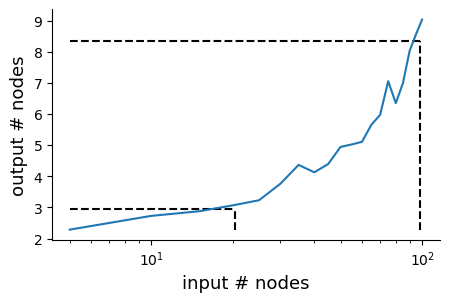

[6.97607129]


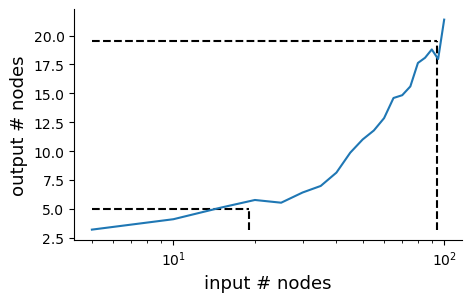

[6.79342078]


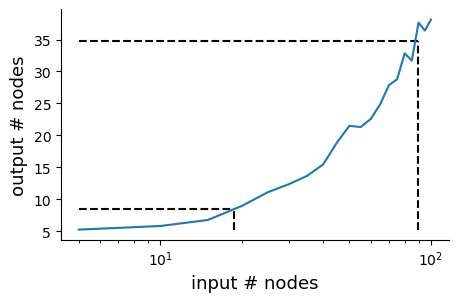

[7.22535707]


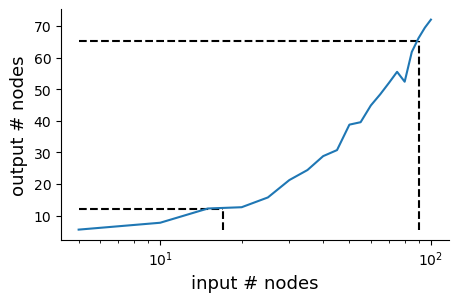

In [13]:
from sklearn.linear_model import LinearRegression

for i in range(len(k_dyn)):
    output_data = np.load(k_dyn[i], allow_pickle=True)[2:]
    input_range=np.load(k_dyn[i], allow_pickle=True)[0]
    dyn_r, Smax, Smin, Omax, Omin, data = dyn_range(output_data, input_range)
    print(dyn_r)
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib import colors
    fig, axarr = plt.subplots(figsize = (5,3))
    xaxis = input_range
    yaxis = data
    plt.plot(xaxis,yaxis)
    plt.hlines(Omin, np.min(xaxis), Smin, linestyle = '--')
    plt.hlines(Omax, np.min(xaxis), Smax, linestyle = '--')
    plt.vlines(Smin, np.min(yaxis), Omin, linestyle = '--')
    plt.vlines(Smax, np.min(yaxis), Omax, linestyle = '--')
    axarr.set_ylabel('output # nodes', size = '13')
    axarr.set_xlabel('input # nodes', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    axarr.set_xscale('log')
    plt.show()


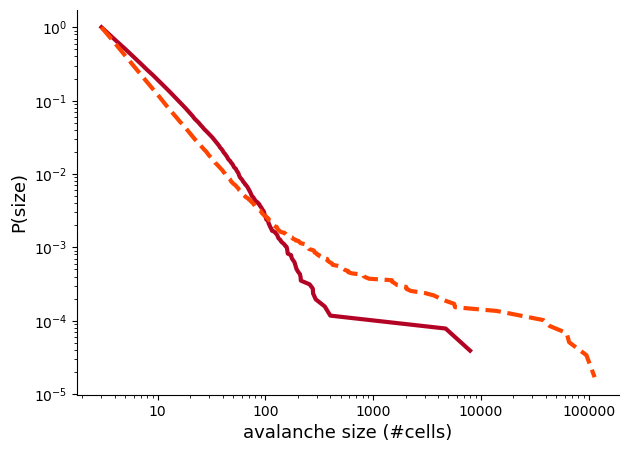

In [13]:
#COST MEAN
colors = cm.coolwarm(np.linspace(0, 1, len(vth_av_list)))

fig, axarr = plt.subplots(figsize = (7,5))



av = vth_av_list[-1][0]
powerlaw.plot_ccdf(av, linestyle = '-',linewidth = 3, markersize = 1.5, alpha = 1, c = colors[-1]) 



avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig('av_vth_fits.svg', transparent = True)
plt.show()

In [15]:
#PRE PRAC PARAMS
os.chdir(Fdrop + 'Project/' + experiment)
pre_fit = sorted(glob.glob('*brute*optimise*pre.*'))
pre_fit
mean_pre = np.load(pre_fit[1], allow_pickle=True)[-1][0]
k = int(mean_pre[0])
v_th = mean_pre[1]
k, v_th

(24, 18.999836773778092)

In [17]:
np.save(Fdrop + 'Project/' + experiment + os.sep + 'brute_optimise_mean_pre-p20_free_r_const_k_vth_lim85k.npy', total_list)

In [16]:
#Fit with r
from scipy.optimize import brute
from scipy import stats

total_list = []
def cost(params):
    print(params)  # <-- you'll see that params is a NumPy array
    r  = params # <-- for readability you may wish to assign names to the component variables
    bind, spikes, volt, spike_mon = netfn.run_net(sim_time, int(k), v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av,pkg = crfn.avalanche_r(net_nnb, bind)
    cost_max, cost_mean = ks_log(av[0], p20_vec, 85000)
    total_list.append([params, cost_mean, av])
    print('cost = ' + str(cost_mean))
    return cost_mean

#Define params
ranges = [slice(0, 8, 1)]
result = brute(cost, ranges)
np.save(Fdrop + 'Project/' + experiment + os.sep + 'brute_optimise_mean_pre-p20_free_r_const_k_vth_lim85k.npy', total_list)

[0]
cost = 1
[1]
cost = 1
[2]
cost = 1
[3]
cost = 1
[4]
cost = 0.2887962402443382
[5]
cost = 0.5621879566702656
[6]
cost = 0.714995180205975
[7]
cost = 0.601308483881736
[4.]
cost = 0.45041058627304387
[4.2]
cost = 0.30132126589574054
[4.4]
cost = 0.5585086304698504
[4.1]
cost = 0.4354622846994074
[4.3]


KeyboardInterrupt: 

In [11]:
#==============================
def ks_log(empirical, model, cutoff): #Find the distance between 2 distributions in log space
#==============================
    import numpy as np
    import matplotlib
    from matplotlib import pyplot as plt
    fig, axarr = plt.subplots(figsize = (5,3))
    binvec = np.append(empirical,model)
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 100000
    model_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    model_xaxis = np.log10(model_hist[1])
    model_yaxis = np.log10(model_hist[0])

    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])

    mod_inf = np.where(model_yaxis == float('-inf'))[0]
    emp_inf = np.where(emp_yaxis == float('-inf'))[0]
    plt.close(fig)
    
    
    if len(emp_inf) == 0 and len(mod_inf) == 0:
        end_index = len(emp_inf)

    elif len(emp_inf) == 0:
        end_index = mod_inf[0] 

    elif len(mod_inf) == 0:
        end_index = emp_inf[0] 
        

    diff_vec = abs(abs(model_yaxis[:end_index]) - abs(emp_yaxis[:end_index ]))

    cost_max, cost_mean = np.max(diff_vec), np.mean(diff_vec)
    
    if len(emp_inf) > cutoff or len(mod_inf)>cutoff:
        cost_max, cost_mean = 1,1

    return(cost_max, cost_mean)

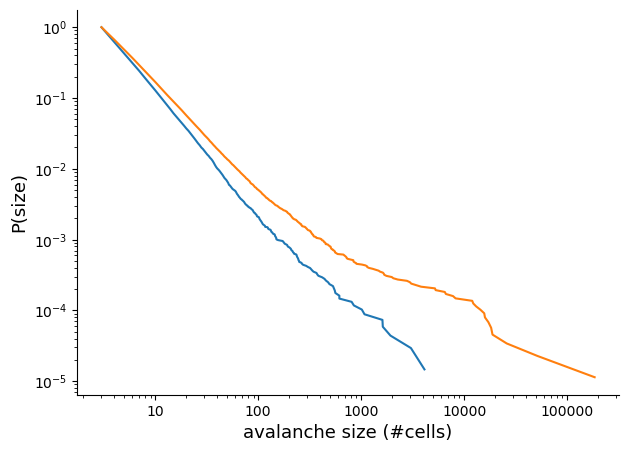

In [7]:
import matplotlib
import powerlaw
os.chdir(Fdrop + 'Project/' + experiment)
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [8]:
#Calculate number of simulatons to do - to have 95% chance of generating maximum avalanche
def num_sims(empirical, cutoff):
    import matplotlib.pyplot as plt
    import math
    fig, axarr = plt.subplots(figsize = (7,5))
    hist = axarr.hist(empirical, bins = 100000, density = True, histtype = 'step', cumulative = -1)
    p = 1-(10**(np.log10(hist[0])[np.where(np.log10(hist[1]) > np.log10(cutoff))[0][0]])) #probability of getting avalanches of size cutoff or smaller
    number = 0.05 
    base = p
    exponent = int(math.log(number, base)) #number of simulations as the power to which p is raised to get 95% probability 
    return(exponent)

#Simulation parameters
#======================
cutoff = 1000
n_sims= num_sims(bln_vec, cutoff)
n_sims

29156

In [28]:
import random
s0 = random.uniform(0, 5)
k0 = random.randint(10, 40)

print('divisor = ' + str(divisor))
print('soften = ' + str(soften))
print('cutoff = ' + str(cutoff))
print('n_sims = ' + str(n_sims))
print('s0 = ' + str(s0))
print('k0 = ' + str(k0))

divisor = 200
soften = 0.07
cutoff = 1000
n_sims = 29156
s0 = 3.1182764597542785
k0 = 10


In [ ]:
#Parameter sweep
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import stats
total_list = []
def ks_dist(params):
    print(params)  # <-- you'll see that params is a NumPy array
    s, k  = params # <-- for readability you may wish to assign names to the component variables
    avs = netfn.ba_netsim(dist).simulate(s, int(k), 0,  divisor, soften, cutoff, n_sims, 1).av_size
    ks = stats.ks_2samp(empirical, avs)[0]
    total_list.append([params, ks, avs])
    print('ks = ' + str(ks))
    return ks

#Define params
empirical = p20_vec
dist = dist
ranges = (slice(0, 15, 0.1), slice(2, 10, 1))
result = brute(ks_dist, ranges)

In [10]:
os.chdir(Fdrop + 'Project/' + experiment)

costlist, paramlist, avlist = list(range(len(total_list))), list(range(len(total_list))), list(range(len(total_list)))
for i in range(len(total_list)):
    paramlist[i] = total_list[i][0]
    costlist[i] = total_list[i][1]
    avlist[i] = total_list[i][2]
    
np.save('optimise_brute_ksdistlow_ba_p20f1_params.npy',   paramlist)
np.save('optimise_brute_ksdistlow_ba_p20f1_cost.npy',    costlist)
np.save('optimise_brute_ksdistlow_ba_p20f1_avs.npy',  avlist)

print('iterations = ' + str(len(costlist)) + '  true min = ' + str(np.where(costlist == np.min(costlist))[0][0]))
print('min cost = ' + str(costlist[np.where(costlist == np.min(costlist))[0][0]]))
print('min params = ' + str(paramlist[np.where(costlist == np.min(costlist))[0][0]]))
curr = avlist[np.where(costlist == np.min(costlist))[0][0]]

iterations = 1603  true min = 1280
min cost = 0.008736868685800259
min params = [7.33359864 8.10312262]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
avlist = sorted(glob.glob('optimise*ks*ba+*avs.npy'))
costlist = sorted(glob.glob('optimise*ks*ba+*cost.npy'))
paramlist = sorted(glob.glob('optimise*ks*ba+*params.npy'))
avlist, costlist, paramlist

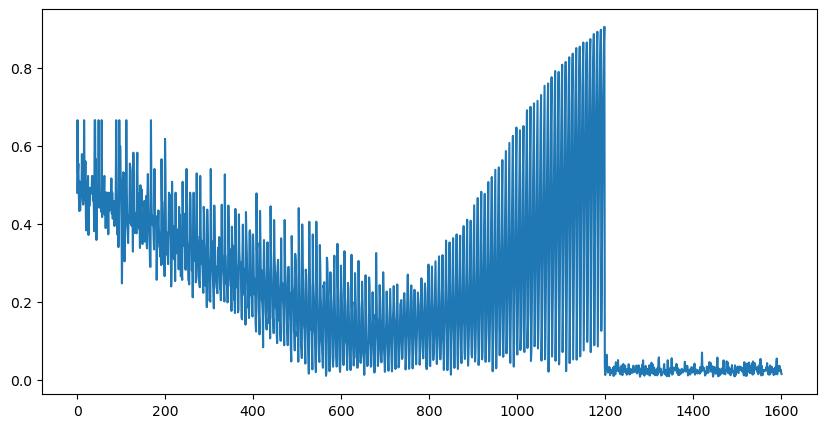

In [12]:
fig = plt.figure(figsize= (10,5))
plt.plot(np.arange(0, len(costlist)), costlist)
plt.show()

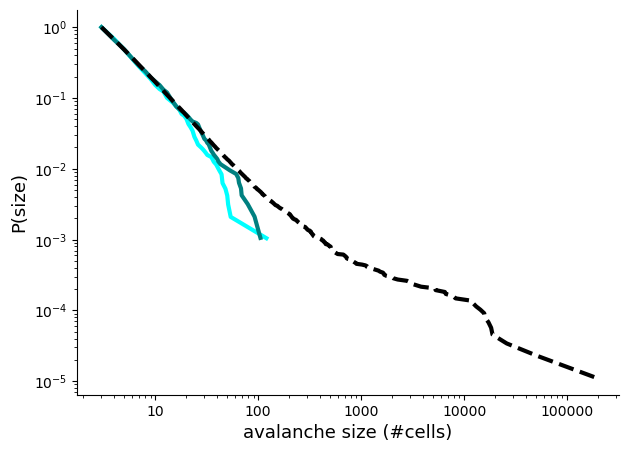

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy
os.chdir(F10t + 'Project/' + experiment)


import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   

avdistcut = avlist[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')

avdistcut = avlist[np.where(costlist == np.min(costlist))[0][0]]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'teal')

avdistcut = empirical
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

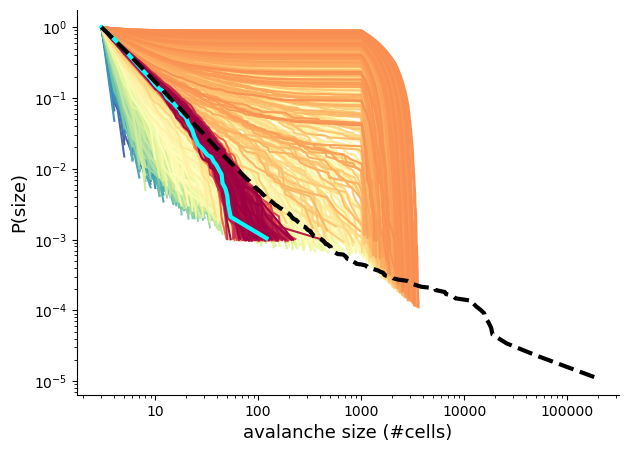

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy
os.chdir(F10t + 'Project/' + experiment)


colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))

#Cycle length - small network
import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
    

avdistcut = total_list[-1][2]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')

avdistcut = empirical
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
avlist = sorted(glob.glob('optimise*ks*low*ba*avs.npy'))
costlist = sorted(glob.glob('optimise*ks*low*ba*cost.npy'))
paramlist = sorted(glob.glob('optimise*ks*low*ba*params.npy'))
avlist, costlist, paramlist

(['optimise_brute_ksdistlow_ba_blnf1_avs.npy',
  'optimise_brute_ksdistlow_ba_p20f1_avs.npy'],
 ['optimise_brute_ksdistlow_ba_blnf1_cost.npy',
  'optimise_brute_ksdistlow_ba_p20f1_cost.npy'],
 ['optimise_brute_ksdistlow_ba_blnf1_params.npy',
  'optimise_brute_ksdistlow_ba_p20f1_params.npy'])

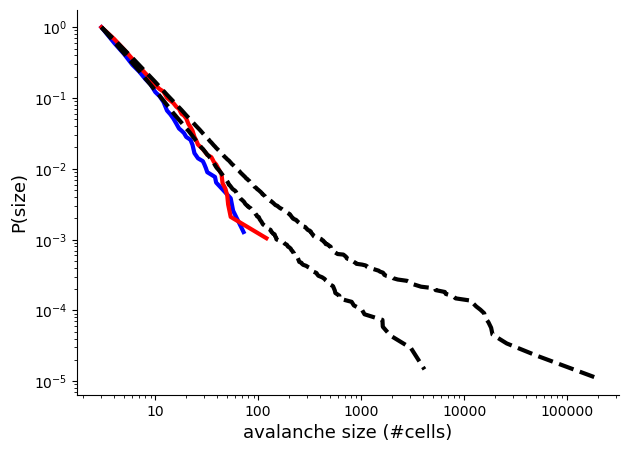

baseline = [8.85222392 5.06457948]
ptz = [7.33359864 8.10312262]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy

import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   
avdistcut = np.load(avlist[0], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'blue')

avdistcut = np.load(avlist[1], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'red')

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')

avdistcut =p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

print('baseline = ' + str(np.load(paramlist[0], allow_pickle=True)[-1]))
print('ptz = ' + str(np.load(paramlist[1], allow_pickle=True)[-1]))

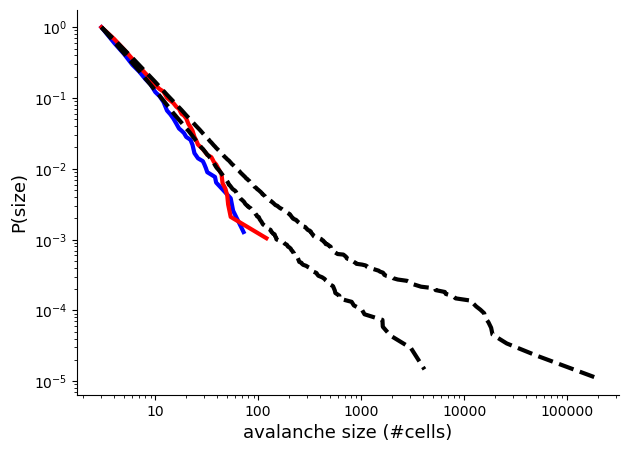

baseline = [8.85222392 5.06457948]
ptz = [7.33359864 8.10312262]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy

import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   
avdistcut = np.load(avlist[0], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'blue')

avdistcut = np.load(avlist[1], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'red')

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')

avdistcut =p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

print('baseline = ' + str(np.load(paramlist[0], allow_pickle=True)[-1]))
print('ptz = ' + str(np.load(paramlist[1], allow_pickle=True)[-1]))

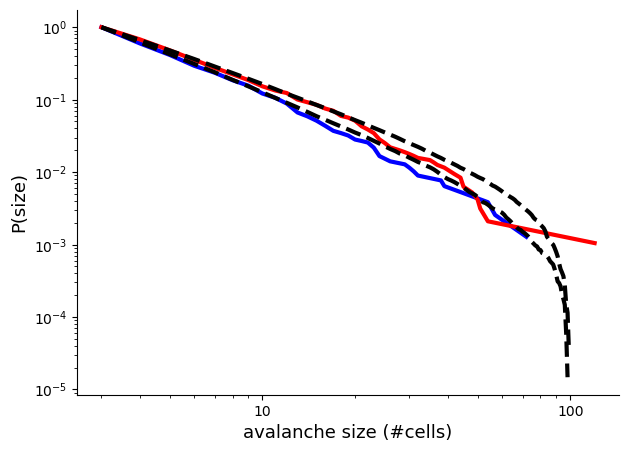

baseline = [8.85222392 5.06457948]
ptz = [7.33359864 8.10312262]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import scipy

import matplotlib
import powerlaw

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
                   
avdistcut = np.load(avlist[0], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'blue')

avdistcut = np.load(avlist[1], allow_pickle=True)[-1]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'red')

avdistcut = bln_vec[np.where(bln_vec < 100)[0]]
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')

avdistcut =p20_vec[np.where(p20_vec < 100)[0]]
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
        
        
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()

print('baseline = ' + str(np.load(paramlist[0], allow_pickle=True)[-1]))
print('ptz = ' + str(np.load(paramlist[1], allow_pickle=True)[-1]))

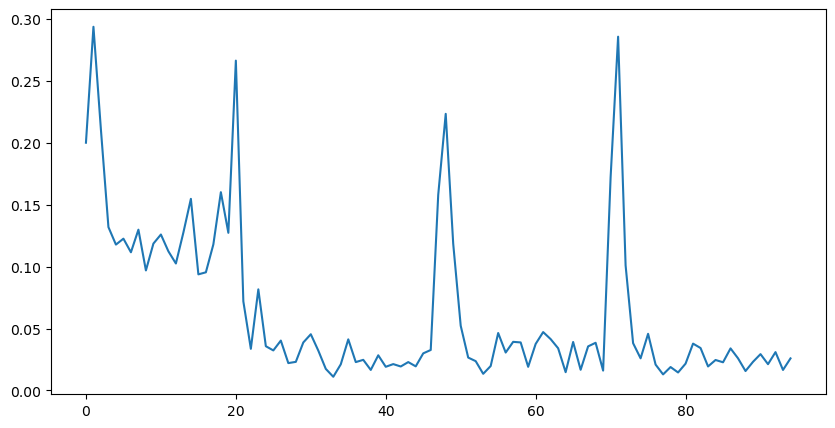

In [39]:
fig = plt.figure(figsize= (10,5))
plt.plot(np.arange(0, len(costlist)), costlist)
plt.show()